<a href="https://colab.research.google.com/github/Shir095/BALC_2127839/blob/main/RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bryan Alejandro Lara Carrera
# Matricula: 2127839
# Brigada: 008  Hora: N4
# Actividad 8 - Uso de software para busqueda

In [1]:
# PASO 1 - IMPORTAR LIBRERÍAS
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [2]:
# VISUALIZACIÓN DE DATOS
keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
# PASO 2 - IMPORTAR SET DE DATOS
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
# PREPARACIÓN DE CLASES
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco',
               'Seis', 'Siete', 'Ocho', 'Nueve']

In [5]:
# EXPLORANDO IMÁGENES DE PRUEBA
x_test.shape

(10000, 28, 28)

In [6]:
# EXPLORANDO IMÁGENES DE ENTRENAMIENTO
x_train.shape

(60000, 28, 28)

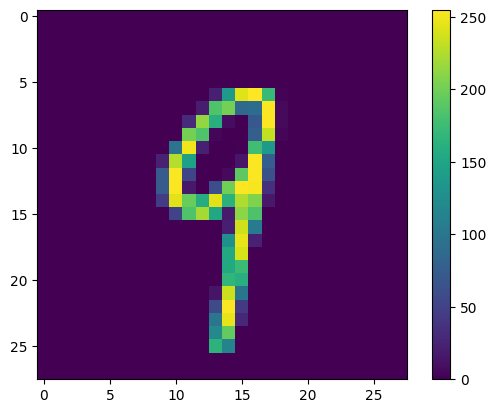

In [7]:
# PASO 3 - PROCESAMIENTO DE DATOS
plt.figure()
plt.imshow(x_train[900])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# ESCALANDO VALORES DE IMÁGENES
x_train = x_train / 255.0
x_test = x_test / 255.0

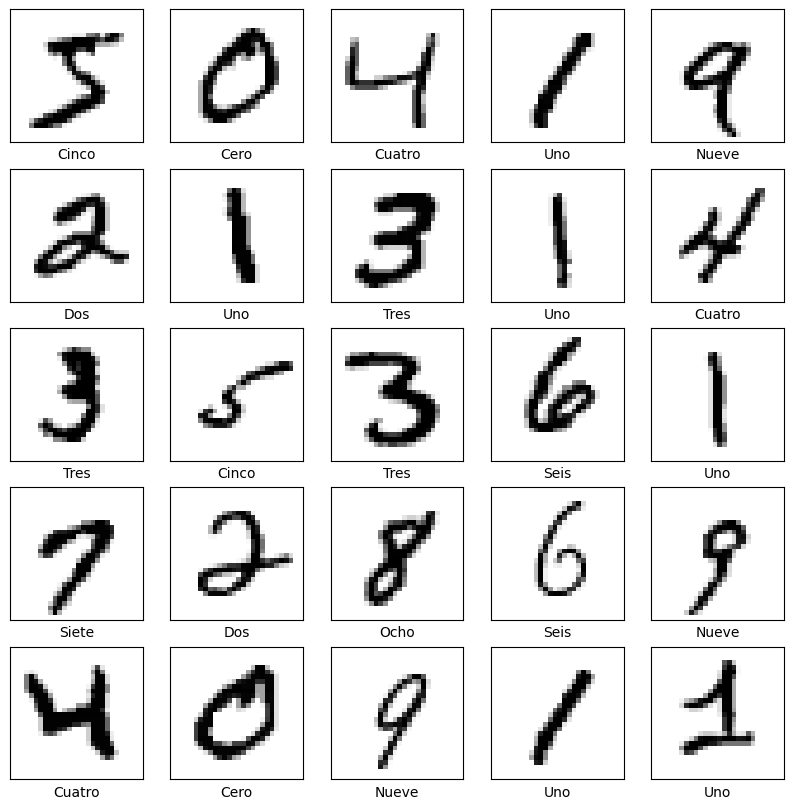

In [9]:
# VISUALIZACIÓN DE LAS PRIMERAS 25 IMÁGENES
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

    label_index = y_train[i]
    if 0 <= label_index < len(class_names):
        plt.xlabel(class_names[label_index])
    else:
        plt.xlabel(f"Unknown Label ({label_index})")
plt.show()

In [14]:
# PASO 4 - SELECCIÓN Y ENTRENAMIENTO DEL MODELO
model = keras.Sequential([
    # CONSTRUCCIÓN DE LA RED NEURONAL
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
# COMPILACIÓN DEL MODELO DE APRENDIZAJE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# ENTRENAMIENTO DE LA RED
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8738 - loss: 0.4422
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9630 - loss: 0.1265
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9765 - loss: 0.0831
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9832 - loss: 0.0566
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0427
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9893 - loss: 0.0347
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9918 - loss: 0.0260
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9938 - loss: 0.0210
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9957 - loss: 0.0157
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0129


In [17]:
# EVALUACIÓN DE EXACTITUD DE LA RED
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9725 - loss: 0.1033

Test accuracy: 0.9725000262260437


In [18]:
# PASO 5 - PRUEBA DEL MODELO
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
# RESULTADOS DE LA IMÁGEN 1200 (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[1200]

array([2.47092173e-03, 5.79764992e-02, 6.58435689e-04, 1.05031095e-01,
       3.29630439e-07, 8.82643508e-05, 3.32902127e-05, 4.33275593e-04,
       8.33168268e-01, 1.39509182e-04], dtype=float32)

In [20]:
np.argmax(predictions[1200])

8

In [21]:
# RESULTADOS DE LA ÚLTIMA IMÁGEN (SEGÚ LA PROBABILIDAD, ¿QUÉ NÚMERO ES?)
y_test[1200]

8

In [22]:
# FUNCIÓN PARA VISUALIZACIÓN DE IMÁGENES DE RESULTADO
def plot_image(i, predictions_array, y_test, img):
  predictions_array, true_label, img = predictions_array, y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

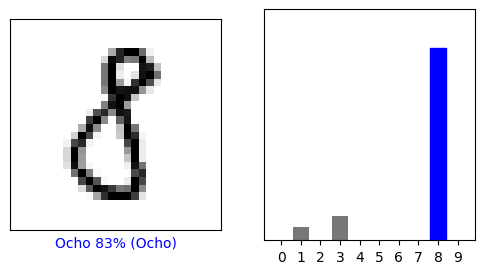

In [23]:
# RESULTADOS DE LA ÚLTIMA IMÁGEN (VISUALIZACIÓN DE LA IMÁGEN Y RESULTADOS EN TABLAS)
i = 1200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [24]:
# RESULTADOS DE LA ÚLTIMA IMÁGEN (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[-1]

array([2.4842796e-11, 2.8444413e-14, 7.8881196e-10, 7.5707066e-11,
       1.0474026e-09, 5.6911056e-12, 9.9999994e-01, 9.6599968e-16,
       1.5300166e-13, 6.0462603e-12], dtype=float32)

In [25]:
np.argmax(predictions[-1])

6

In [26]:
# RESULTADOS DE LA ÚLTIMA IMÁGEN (SEGÚ LA PROBABILIDAD, ¿QUÉ NÚMERO ES?)
y_test[-1]

6

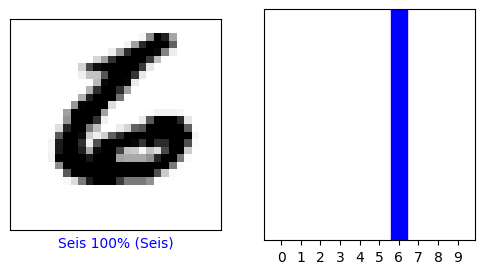

In [27]:
# RESULTADOS DE LA ÚLTIMA IMÁGEN (VISUALIZACIÓN DE LA IMÁGEN Y RESULTADOS EN TABLAS)
i = -1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [28]:
# RESULTADOS DE LA PRIMER IMÁGEN (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[1]

array([2.4983640e-11, 3.0418446e-09, 9.9999994e-01, 4.3383750e-09,
       5.1940569e-21, 4.1936156e-11, 1.8070037e-13, 8.6842020e-17,
       6.4151400e-09, 1.6604276e-17], dtype=float32)

In [29]:
np.argmax(predictions[1])

2

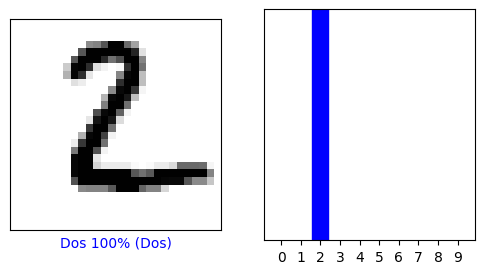

In [30]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [31]:
# RESULTADOS DE LA IMÁGEN 5000 (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[5000]

array([4.6703548e-13, 3.0943529e-11, 4.9650787e-08, 9.9995714e-01,
       1.9942780e-11, 4.2476211e-05, 1.0658344e-15, 7.6029231e-08,
       2.7982654e-07, 1.4666971e-09], dtype=float32)

In [32]:
np.argmax(predictions[5000])

3

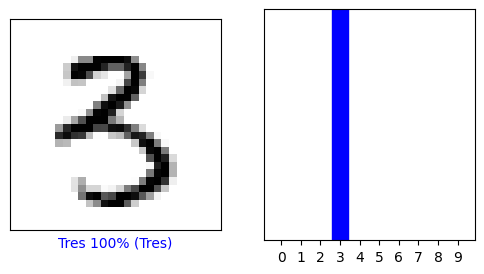

In [33]:
i = 5000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [34]:
# RESULTADOS DE LA IMÁGEN 3694 (PROBABILIDADES DE LOS NÚMEROS QUE PUEDEN SER)
predictions[3694]

array([7.91714472e-10, 3.48295318e-04, 9.99636889e-01, 5.66481795e-08,
       4.78424158e-12, 8.03091968e-11, 8.31942015e-11, 1.48448606e-07,
       1.46459115e-05, 5.61167397e-11], dtype=float32)

In [35]:
np.argmax(predictions[3694])

2

In [36]:
# RESULTADOS DE LA IMÁGEN 3694 (SEGÚN LA PROBABILIDAD, ¿QUÉ NÚMERO ES?)
y_test[3694]

2

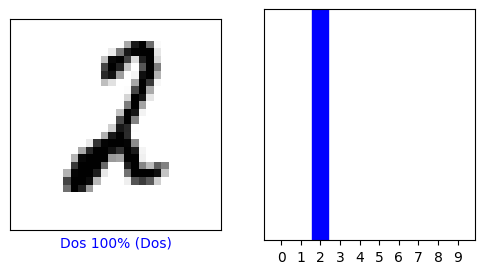

In [37]:
i = 3694
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()